Apply fast neural style transfer using a pretrained TensorFlow Hub model to blend the content of one image with the artistic style of another.

In [26]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [27]:
#Load and preprocess images
def load_image(path,target_size=(256,256)):
    img=Image.open(tf.keras.utils.get_file(path.split('/')[-1],path)).convert('RGB')
    img=img.resize(target_size)
    img=np.array(img)/255.0
    return tf.constant(img,dtype=tf.float32)

In [28]:
#Content and style images
content_url = "https://i.pinimg.com/736x/f5/fa/98/f5fa980c7dec129eda08274403016a53.jpg"
style_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg"

In [29]:
#Load content and style images
content_image=load_image(content_url)
style_image=load_image(style_url)

45836/45836 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
#Add batch dimension
content_image=tf.expand_dims(content_image,axis=0)
style_image=tf.expand_dims(style_image,axis=0)

In [31]:
#Load model
style_transfer_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [32]:
#Apply style transfer
stylized_image=style_transfer_model(content_image,style_image)[0]

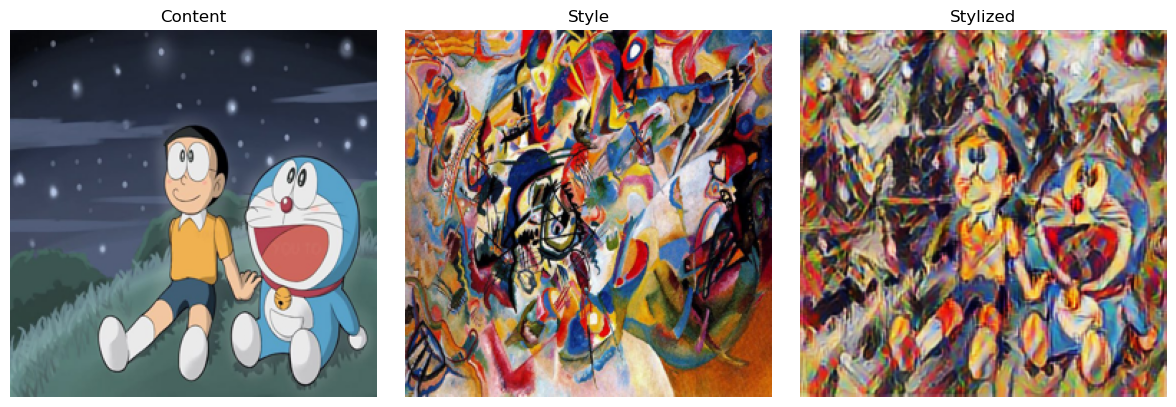

In [33]:
#Display
def show_image(img_tensor, title):
    img = tf.squeeze(img_tensor).numpy()
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
show_image(content_image, "Content")

plt.subplot(1, 3, 2)
show_image(style_image, "Style")

plt.subplot(1, 3, 3)
show_image(stylized_image, "Stylized")
plt.tight_layout()
plt.show()